<div align="center">

#### Lab 3

# National Tsing Hua University

#### Spring 2025

#### 11320IEEM 513600

#### Deep Learning and Industrial Applications
    
## Lab 3: Anomaly Detection in Industrial Applications

</div>

### Introduction

In today's industrial landscape, the ability to detect anomalies in manufacturing processes and products is critical for maintaining quality, efficiency, and safety. This lab focuses on leveraging deep learning techniques for anomaly detection in various industrial applications, using the MVTEC Anomaly Detection Dataset. By employing ImageNet-pretrained models available in torchvision, students will gain hands-on experience in classfying defects and irregularities across different types of industrial products.

Throughout this lab, you'll be involved in the following key activities:
- Explore and process the MVTec Anomaly Detection Dataset.
- Apply ImageNet-pretrained models from [Torchvision](https://pytorch.org/vision/stable/models.html) to detect anomalies in industrial products.
- Evaluate the performance of the models to understand their effectiveness in real-world industrial applications.

### Objectives

- Understand the principles of anomaly detection in the context of industrial applications.
- Learn how to implement and utilize ImageNet-pretrained models for detecting anomalies.
- Analyze and interpret the results of the anomaly detection models to assess their practicality in industrial settings.

### Dataset

The MVTec AD Dataset is a comprehensive collection of high-resolution images across different categories of industrial products, such as bottles, cables, and metal nuts, each with various types of defects. This dataset is pivotal for developing and benchmarking anomaly detection algorithms. You can download our lab's dataset [here](https://drive.google.com/file/d/19600hUOpx0hl78TdpdH0oyy-gGTk_F_o/view?usp=share_link). You can drop downloaded data and drop to colab, or you can put into yor google drive.

### References
- [MVTec AD Dataset](https://www.kaggle.com/datasets/ipythonx/mvtec-ad/data) for the dataset used in this lab.
- [Torchvision Models](https://pytorch.org/vision/stable/models.html) for accessing ImageNet-pretrained models to be used in anomaly detection tasks.
- [State-of-the-Art Anomaly Detection on MVTec AD](https://paperswithcode.com/sota/anomaly-detection-on-mvtec-ad) for insights into the latest benchmarks and methodologies in anomaly detection applied to the MVTec AD dataset.
- [CVPR 2019: MVTec AD — A Comprehensive Real-World Dataset for Unsupervised Anomaly Detection] for the original paper of MVTec AD dataset.

In [1]:
import glob
import matplotlib.pyplot as plt
import random
from tqdm.auto import tqdm
import cv2
import numpy as np

In [2]:
# from google.colab import drive

# drive.mount('/content/drive')
# !tar -xvf drive/MyDrive/cable.tar.gz cable

In [3]:
# file_paths = glob.glob('cable/*/*.png')
# file_paths = sorted([path for path in file_paths if path.split('/')[-1] in [f'{i:03}.png' for i in range(10)]])

In [4]:
import glob
import cv2
import numpy as np
import os

root_path = r"D:\lab3\dataset\cable"
subfolders = ['train', 'test', 'ground_truth']

# 📊 統計各子資料夾的圖片數量
folder_image_counts = {}

# 所有圖片集中起來（可選）
all_images = []
all_paths = []

for folder in subfolders:
    full_path = os.path.join(root_path, folder)
    
    # 🔍 遞迴搜尋該資料夾下所有 png / PNG
    file_paths = glob.glob(os.path.join(full_path, '**', '*.png'), recursive=True) + \
                 glob.glob(os.path.join(full_path, '**', '*.PNG'), recursive=True)
    file_paths = sorted(list(set(file_paths)))  # 去重複

    folder_image_counts[folder] = len(file_paths)
    all_paths.extend(file_paths)

    # 🖼️ 可選：這裡也可以讀圖片（如你原本所做）
    for path in file_paths:
        img = cv2.imread(path)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            all_images.append(img)

# ✅ 印出統計結果
print("📊 各資料夾圖片數量：")
for folder, count in folder_image_counts.items():
    print(f" - {folder}: {count} 張圖片")

# ✅ 如果你要全部合併起來用
images = np.array(all_images)
print(f"\n✅ 總共讀入 {len(images)} 張圖片，shape = {images.shape}")


📊 各資料夾圖片數量：
 - train: 224 張圖片
 - test: 150 張圖片
 - ground_truth: 92 張圖片

✅ 總共讀入 466 張圖片，shape = (466, 1024, 1024, 3)


In [5]:
# import glob
# import cv2
# import numpy as np
# import os

# root_path = r"D:\lab3\dataset\cable"

# # 🔍 遞迴抓圖，並去重複
# file_paths = glob.glob(os.path.join(root_path, '**', '*.png'), recursive=True) + \
#              glob.glob(os.path.join(root_path, '**', '*.PNG'), recursive=True)
# file_paths = sorted(list(set(file_paths)))  # ✅ 去除重複

# print(f"📂 共找到 {len(file_paths)} 張圖片（預覽前 10 張）：")
# for path in file_paths[:10]:
#     print(" -", path)

# # 🖼 讀圖
# images = []
# for path in file_paths:
#     img = cv2.imread(path)
#     if img is None:
#         print(f"⚠️ 無法讀取圖片：{path}")
#         continue
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     images.append(img)

# images = np.array(images)
# print(f"\n✅ 成功讀入 {len(images)} 張圖片，shape = {images.shape}")


In [6]:
all_data = []

for img in tqdm(file_paths):
    img = cv2.imread(img)
    img = img[..., ::-1]
    all_data.append(img)

all_data = np.stack(all_data)
print(all_data.shape)

  0%|          | 0/92 [00:00<?, ?it/s]

(92, 1024, 1024, 3)


Classes: ['bent_wire', 'cable_swap', 'combined', 'cut_inner_insulation', 'cut_outer_insulation', 'missing_cable', 'missing_wire', 'poke_insulation']


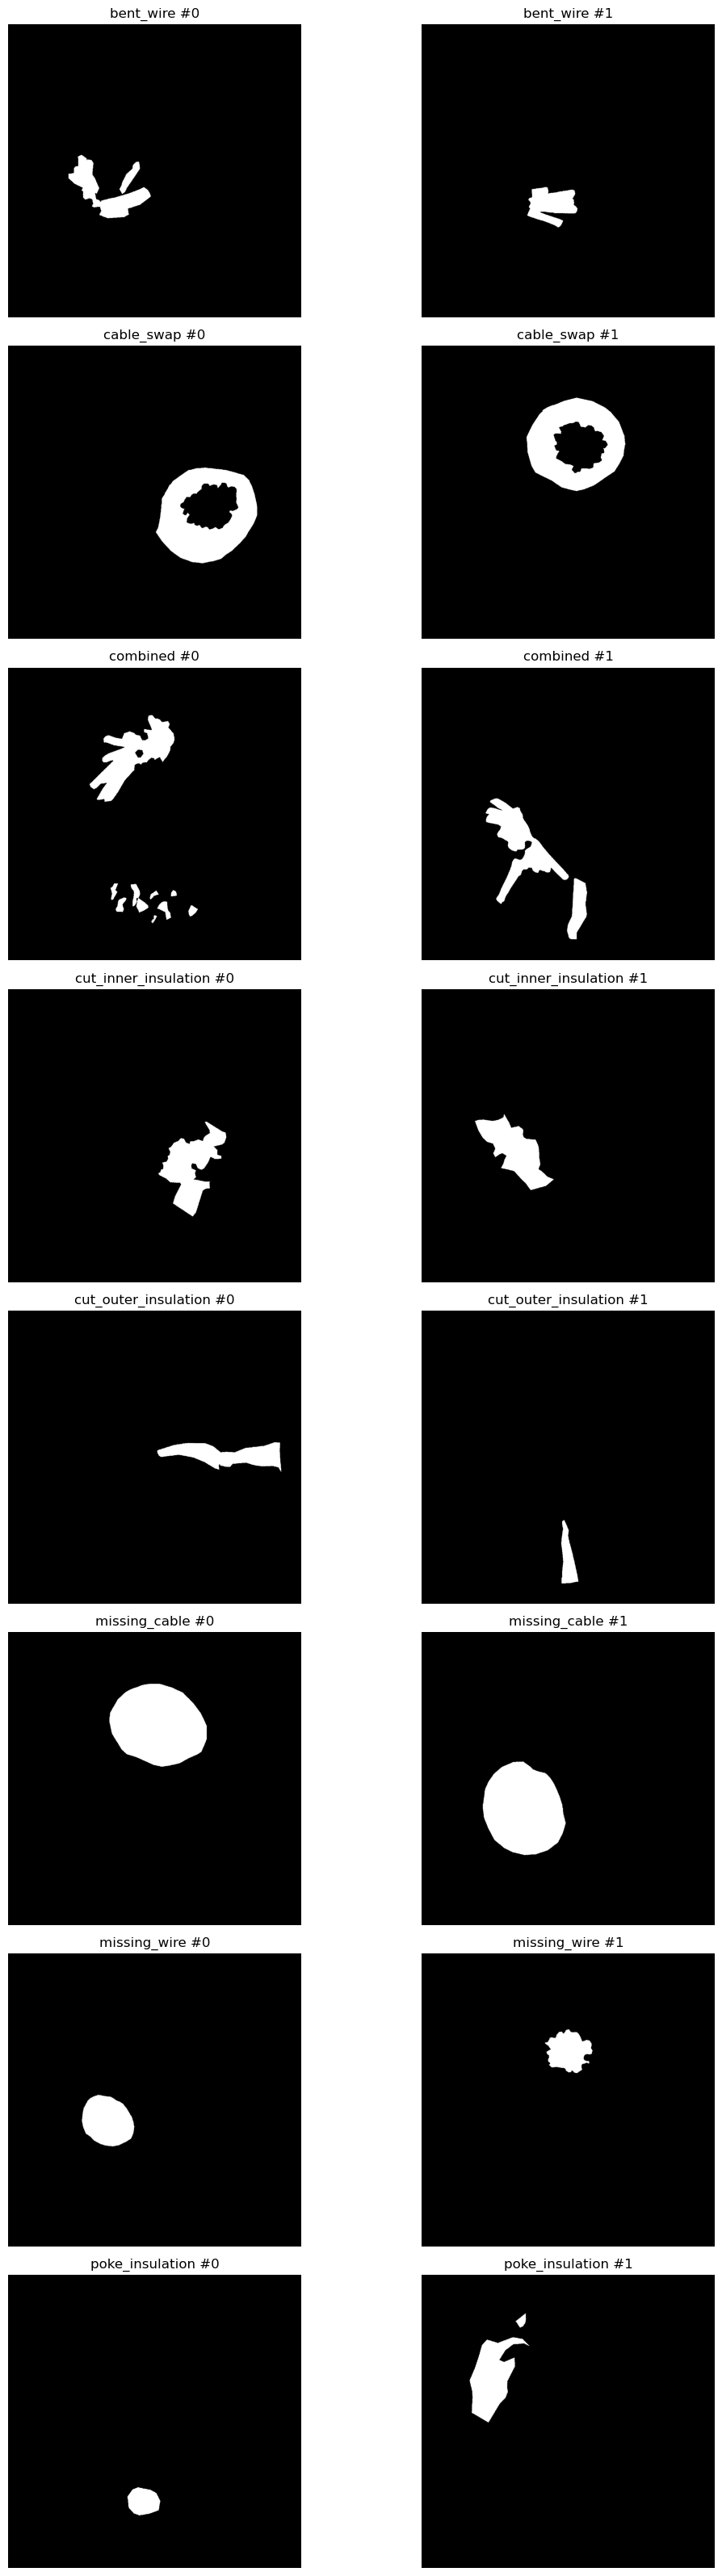

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import os

# 取得類別名稱（資料夾名稱）
classes = sorted(set([os.path.basename(os.path.dirname(p)) for p in file_paths]))
print(f"Classes: {classes}")

# 把每個 class 對應到圖片
class_to_imgs = {cls: [] for cls in classes}
for img, path in zip(all_data, file_paths):
    cls = os.path.basename(os.path.dirname(path))
    class_to_imgs[cls].append(img)

# 畫圖：每類別選 2 張圖片出來
fig, axs = plt.subplots(len(classes), 2, figsize=(6 * 2, 4 * len(classes)))
for i, cls in enumerate(classes):
    for j in range(2):
        axs[i, j].imshow(class_to_imgs[cls][j])
        axs[i, j].set_title(f"{cls} #{j}")
        axs[i, j].axis('off')

plt.tight_layout()
plt.show()


## A. Data Loading and Preprocessing

In [8]:
import torch
from torch.utils.data import DataLoader, TensorDataset, random_split
import numpy as np

num_classes = 8
images_per_class = 10
train_images_per_class = int(images_per_class * 0.8)
val_images_per_class = int(images_per_class * 0.2)

x_train = []
x_val = []

for i in range(num_classes):
    start_index = i * images_per_class
    x_train.extend(all_data[start_index:start_index + train_images_per_class])
    x_val.extend(all_data[start_index + train_images_per_class:start_index + images_per_class])

# The shape changes from (batch_size, height, width, channels) to (batch_size, channels, height, width)
x_train = np.transpose(np.array(x_train), (0, 3, 1, 2))
x_val = np.transpose(np.array(x_val), (0, 3, 1, 2))

y_train = np.concatenate([np.full(train_images_per_class, i) for i in range(num_classes)])
y_val = np.concatenate([np.full(val_images_per_class, i) for i in range(num_classes)])

print(f'Shape of x_train: {x_train.shape}')
print(f'Shape of x_val: {x_val.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_val: {y_val.shape}')

Shape of x_train: (64, 3, 1024, 1024)
Shape of x_val: (16, 3, 1024, 1024)
Shape of y_train: (64,)
Shape of y_val: (16,)


In [9]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image

train_transforms = transforms.Compose(
    [
        transforms.Resize((32, 32)),
        transforms.AutoAugment(),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
    ]
)

val_transforms = transforms.Compose(
    [
        transforms.Resize((32, 32)),
        transforms.ToTensor(),
    ]
)

class MyDataset(Dataset):
    def __init__(self, x, y, transform=None):
        self.x = x
        self.y = torch.from_numpy(y).long()
        self.transform = transform

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        new_x = np.transpose(self.x[idx], (1, 2, 0))
        return self.transform(Image.fromarray(new_x)), self.y[idx]

In [10]:
batch_size = 32

train_dataset = MyDataset(x_train, y_train, train_transforms)
val_dataset = MyDataset(x_val, y_val, val_transforms)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False, num_workers=0, pin_memory=True)

## B. Defining Neural Networks

In [11]:
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models

model = models.resnet18(weights='IMAGENET1K_V1')

# ConvNet as fixed feature extractor (freeze parameters)
for param in model.parameters():
    param.requires_grad = False

num_ftrs = model.fc.in_features
num_class = 8

# change # of class from 1000 into 8 in the last layer
model.fc = nn.Linear(num_ftrs, num_class)
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

## C. Training the Neural Network

[1/50] Train Acc: 12.50% | Val Acc: 12.50%
[2/50] Train Acc: 12.50% | Val Acc: 12.50%
[3/50] Train Acc: 12.50% | Val Acc: 12.50%
[4/50] Train Acc: 12.50% | Val Acc: 12.50%
[5/50] Train Acc: 12.50% | Val Acc: 12.50%
[6/50] Train Acc: 12.50% | Val Acc: 12.50%
[7/50] Train Acc: 12.50% | Val Acc: 12.50%
[8/50] Train Acc: 14.06% | Val Acc: 12.50%
[9/50] Train Acc: 18.75% | Val Acc: 18.75%
[10/50] Train Acc: 17.19% | Val Acc: 25.00%
[11/50] Train Acc: 14.06% | Val Acc: 12.50%
[12/50] Train Acc: 12.50% | Val Acc: 12.50%
[13/50] Train Acc: 12.50% | Val Acc: 12.50%
[14/50] Train Acc: 12.50% | Val Acc: 12.50%
[15/50] Train Acc: 12.50% | Val Acc: 12.50%
[16/50] Train Acc: 12.50% | Val Acc: 12.50%
[17/50] Train Acc: 10.94% | Val Acc: 18.75%
[18/50] Train Acc: 12.50% | Val Acc: 12.50%
[19/50] Train Acc: 12.50% | Val Acc: 12.50%
[20/50] Train Acc: 12.50% | Val Acc: 12.50%
[21/50] Train Acc: 12.50% | Val Acc: 12.50%
[22/50] Train Acc: 12.50% | Val Acc: 12.50%
[23/50] Train Acc: 12.50% | Val Acc: 12.5

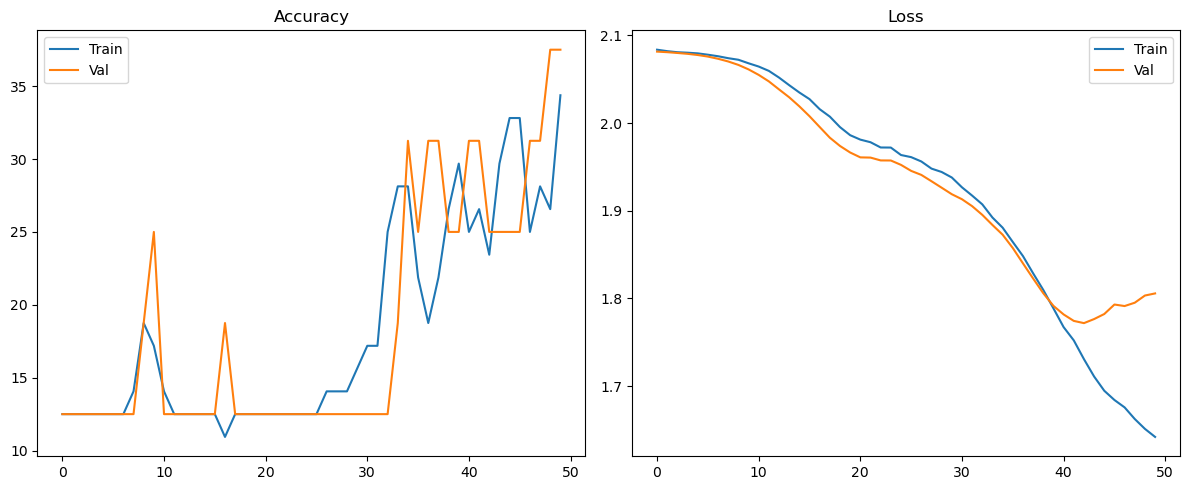

[1/50] Train Acc: 12.50% | Val Acc: 12.50%
[2/50] Train Acc: 12.50% | Val Acc: 12.50%
[3/50] Train Acc: 12.50% | Val Acc: 12.50%
[4/50] Train Acc: 12.50% | Val Acc: 18.75%
[5/50] Train Acc: 12.50% | Val Acc: 18.75%
[6/50] Train Acc: 15.62% | Val Acc: 12.50%
[7/50] Train Acc: 14.06% | Val Acc: 18.75%
[8/50] Train Acc: 14.06% | Val Acc: 12.50%
[9/50] Train Acc: 12.50% | Val Acc: 12.50%
[10/50] Train Acc: 12.50% | Val Acc: 12.50%
[11/50] Train Acc: 12.50% | Val Acc: 12.50%
[12/50] Train Acc: 12.50% | Val Acc: 25.00%
[13/50] Train Acc: 15.62% | Val Acc: 25.00%
[14/50] Train Acc: 18.75% | Val Acc: 18.75%
[15/50] Train Acc: 17.19% | Val Acc: 18.75%
[16/50] Train Acc: 15.62% | Val Acc: 18.75%
[17/50] Train Acc: 14.06% | Val Acc: 18.75%
[18/50] Train Acc: 12.50% | Val Acc: 12.50%
[19/50] Train Acc: 12.50% | Val Acc: 12.50%
[20/50] Train Acc: 12.50% | Val Acc: 12.50%
[21/50] Train Acc: 12.50% | Val Acc: 12.50%
[22/50] Train Acc: 12.50% | Val Acc: 12.50%
[23/50] Train Acc: 12.50% | Val Acc: 12.5

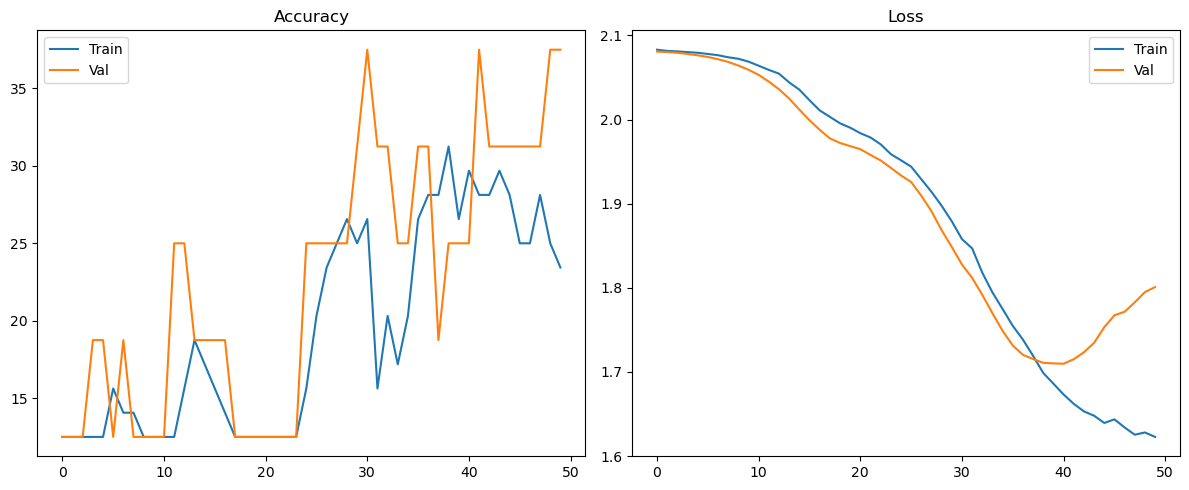

[1/50] Train Acc: 15.62% | Val Acc: 12.50%
[2/50] Train Acc: 12.50% | Val Acc: 12.50%
[3/50] Train Acc: 14.06% | Val Acc: 18.75%
[4/50] Train Acc: 9.38% | Val Acc: 6.25%
[5/50] Train Acc: 9.38% | Val Acc: 12.50%
[6/50] Train Acc: 9.38% | Val Acc: 12.50%
[7/50] Train Acc: 14.06% | Val Acc: 12.50%
[8/50] Train Acc: 14.06% | Val Acc: 12.50%
[9/50] Train Acc: 15.62% | Val Acc: 12.50%
[10/50] Train Acc: 15.62% | Val Acc: 25.00%
[11/50] Train Acc: 15.62% | Val Acc: 25.00%
[12/50] Train Acc: 15.62% | Val Acc: 25.00%
[13/50] Train Acc: 17.19% | Val Acc: 31.25%
[14/50] Train Acc: 15.62% | Val Acc: 25.00%
[15/50] Train Acc: 20.31% | Val Acc: 12.50%
[16/50] Train Acc: 25.00% | Val Acc: 18.75%
[17/50] Train Acc: 25.00% | Val Acc: 6.25%
[18/50] Train Acc: 25.00% | Val Acc: 18.75%
[19/50] Train Acc: 26.56% | Val Acc: 12.50%
[20/50] Train Acc: 25.00% | Val Acc: 6.25%
[21/50] Train Acc: 28.12% | Val Acc: 6.25%
[22/50] Train Acc: 23.44% | Val Acc: 6.25%
[23/50] Train Acc: 29.69% | Val Acc: 6.25%
[24/50

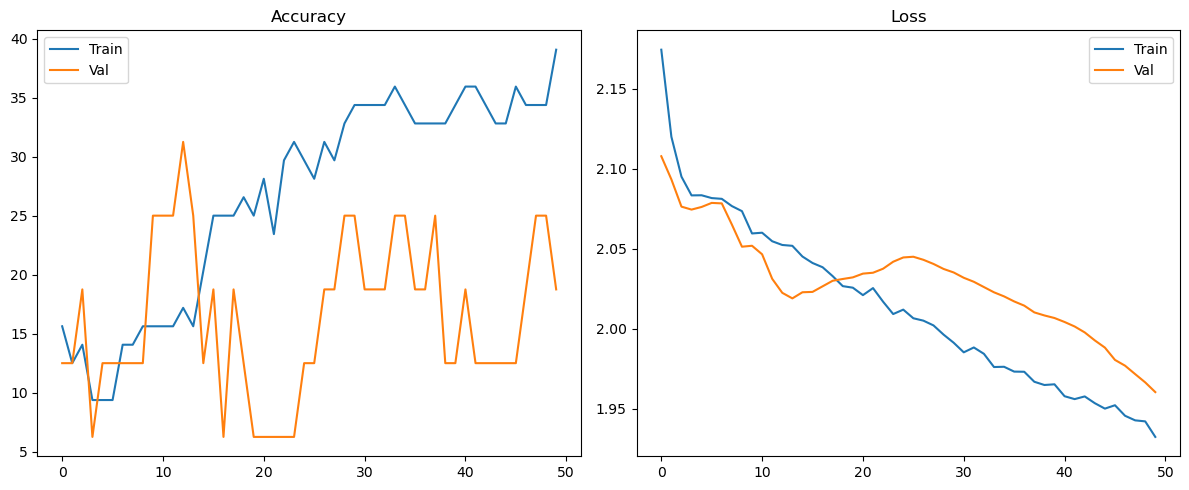

[1/50] Train Acc: 6.25% | Val Acc: 12.50%
[2/50] Train Acc: 12.50% | Val Acc: 12.50%
[3/50] Train Acc: 18.75% | Val Acc: 12.50%
[4/50] Train Acc: 18.75% | Val Acc: 12.50%
[5/50] Train Acc: 15.62% | Val Acc: 18.75%
[6/50] Train Acc: 20.31% | Val Acc: 6.25%
[7/50] Train Acc: 21.88% | Val Acc: 12.50%
[8/50] Train Acc: 18.75% | Val Acc: 12.50%
[9/50] Train Acc: 20.31% | Val Acc: 12.50%
[10/50] Train Acc: 15.62% | Val Acc: 12.50%
[11/50] Train Acc: 14.06% | Val Acc: 12.50%
[12/50] Train Acc: 14.06% | Val Acc: 6.25%
[13/50] Train Acc: 17.19% | Val Acc: 12.50%
[14/50] Train Acc: 17.19% | Val Acc: 18.75%
[15/50] Train Acc: 25.00% | Val Acc: 25.00%
[16/50] Train Acc: 25.00% | Val Acc: 31.25%
[17/50] Train Acc: 29.69% | Val Acc: 25.00%
[18/50] Train Acc: 26.56% | Val Acc: 25.00%
[19/50] Train Acc: 23.44% | Val Acc: 12.50%
[20/50] Train Acc: 29.69% | Val Acc: 12.50%
[21/50] Train Acc: 29.69% | Val Acc: 12.50%
[22/50] Train Acc: 26.56% | Val Acc: 12.50%
[23/50] Train Acc: 28.12% | Val Acc: 12.50%


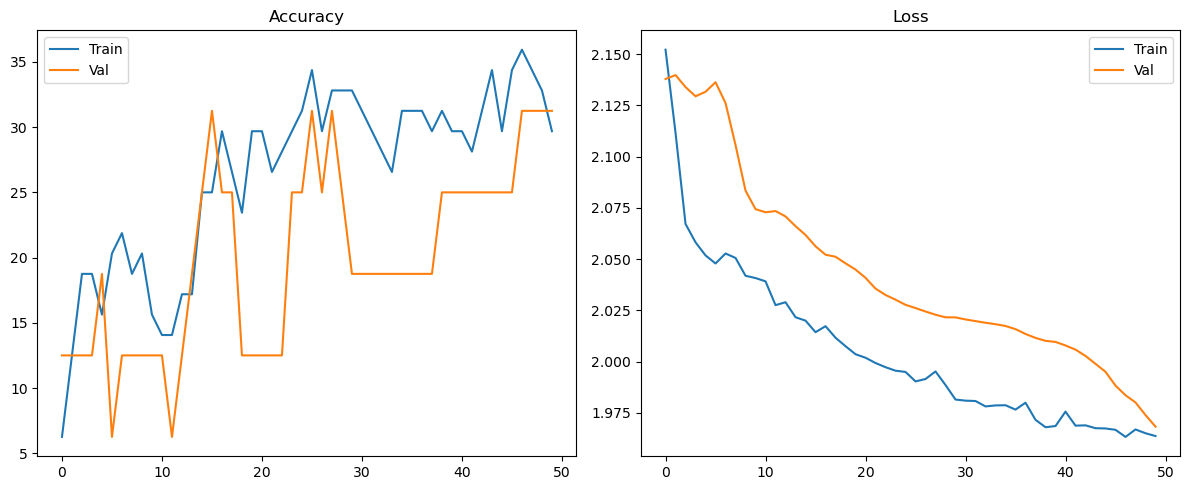

In [12]:
# ✅ HW3 - 四種模型訓練策略

# ✅ 共用 imports
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from torchvision import transforms, models
from torch.optim.lr_scheduler import CosineAnnealingLR
import numpy as np
import matplotlib.pyplot as plt

# ✅ 共用資料（請先定義 x_train, y_train, x_val, y_val）
# x_train, y_train, x_val, y_val = ...

# ✅ 全域變數：儲存訓練結果
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# 共用函數：資料轉 TensorDataset
def make_loader(x, y, transform, batch_size=32):
    from PIL import Image
    processed = []

    for img in x:
        if isinstance(img, torch.Tensor):
            img = img.numpy()

        # --- ✅ 支援 HWC 與 CHW ---
        if img.ndim == 3 and img.shape[-1] == 3:
            # 如果是 (H, W, C)：轉成 PIL 交給 transform
            img = Image.fromarray(img.astype(np.uint8))
            img = transform(img)  # transform 會處理成 tensor 且變成 (C, H, W)

        elif img.ndim == 3 and img.shape[0] == 3:
            # 如果是 (C, H, W)：直接轉成 tensor（已經是 PyTorch 格式）
            img = torch.tensor(img).float() / 255.

        else:
            raise ValueError(f"圖片 shape 有誤：{img.shape}")

        processed.append(img)

    x_tensor = torch.stack(processed)
    y_tensor = torch.from_numpy(y).long()

    dataset = TensorDataset(x_tensor, y_tensor)
    return DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=0)


# 共用函數：訓練
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler=None, epochs=50, mode="model"):
    global train_losses, val_losses, train_accuracies, val_accuracies

    model = model.cuda()
    best_acc = -1
    train_losses.clear()
    val_losses.clear()
    train_accuracies.clear()
    val_accuracies.clear()

    for epoch in range(epochs):
        model.train()
        total_loss, correct = 0, 0
        for images, labels in train_loader:
            images, labels = images.cuda(), labels.cuda()
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            correct += (outputs.argmax(1) == labels).sum().item()
        train_losses.append(total_loss / len(train_loader))
        train_accuracies.append(100. * correct / len(train_loader.dataset))

        model.eval()
        val_loss, correct = 0, 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.cuda(), labels.cuda()
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                correct += (outputs.argmax(1) == labels).sum().item()
        val_losses.append(val_loss / len(val_loader))
        val_acc = 100. * correct / len(val_loader.dataset)
        val_accuracies.append(val_acc)

        if val_acc > best_acc:
            best_acc = val_acc
            torch.save(model.state_dict(), f"{mode}_best.pth")

        if scheduler:
            scheduler.step()

        print(f"[{epoch+1}/{epochs}] Train Acc: {train_accuracies[-1]:.2f}% | Val Acc: {val_acc:.2f}%")

    return train_accuracies, val_accuracies, train_losses, val_losses

# 其餘內容保持不變（略）


# ==========================================================
# 🔹 1. Baseline CNN
# ==========================================================
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=8):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(16, 32, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, padding=1), nn.ReLU(), nn.AdaptiveAvgPool2d((1, 1))
        )
        self.classifier = nn.Linear(64, num_classes)
    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        return self.classifier(x)

transform = transforms.ToTensor()
train_loader = make_loader(x_train, y_train, transform)
val_loader = make_loader(x_val, y_val, transform)

model = SimpleCNN(num_classes=8)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
train_acc, val_acc, train_loss, val_loss = train_model(model, train_loader, val_loader, criterion, optimizer, mode="baseline")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Train')
plt.plot(val_acc, label='Val')
plt.title("Accuracy")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Train')
plt.plot(val_loss, label='Val')
plt.title("Loss")
plt.legend()
plt.tight_layout()
plt.savefig("baseline_results.png")
plt.show()

# ==========================================================
# 🔹 2. Data Augmentation
# ==========================================================
aug_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ColorJitter()
])
train_loader = make_loader(x_train, y_train, aug_transform)
val_loader = make_loader(x_val, y_val, transform)

model = SimpleCNN(num_classes=8)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
train_acc, val_acc, train_loss, val_loss = train_model(model, train_loader, val_loader, criterion, optimizer, mode="augmented")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Train')
plt.plot(val_acc, label='Val')
plt.title("Accuracy")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Train')
plt.plot(val_loss, label='Val')
plt.title("Loss")
plt.legend()
plt.tight_layout()
plt.savefig("augmented_results.png")
plt.show()

# ==========================================================
# 🔹 3. Pretrained ResNet18
# ==========================================================
model = models.resnet18(weights="DEFAULT")
for param in model.parameters():
    param.requires_grad = False
model.fc = nn.Linear(model.fc.in_features, 8)

optimizer = optim.AdamW(model.parameters(), lr=3e-4)
train_loader = make_loader(x_train, y_train, transform)
val_loader = make_loader(x_val, y_val, transform)
train_acc, val_acc, train_loss, val_loss = train_model(model, train_loader, val_loader, criterion, optimizer, mode="resnet18")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Train')
plt.plot(val_acc, label='Val')
plt.title("Accuracy")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Train')
plt.plot(val_loss, label='Val')
plt.title("Loss")
plt.legend()
plt.tight_layout()
plt.savefig("resnet18_results.png")
plt.show()

# ==========================================================
# 🔹 4. ResNet18 + Learning Rate Scheduler
# ==========================================================
model = models.resnet18(weights="DEFAULT")
for param in model.parameters():
    param.requires_grad = False
model.fc = nn.Linear(model.fc.in_features, 8)

optimizer = optim.AdamW(model.parameters(), lr=3e-4)
scheduler = CosineAnnealingLR(optimizer, T_max=len(train_loader)*30, eta_min=0)
train_acc, val_acc, train_loss, val_loss = train_model(model, train_loader, val_loader, criterion, optimizer, scheduler=scheduler, mode="resnet18_sched")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Train')
plt.plot(val_acc, label='Val')
plt.title("Accuracy")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Train')
plt.plot(val_loss, label='Val')
plt.title("Loss")
plt.legend()
plt.tight_layout()
plt.savefig("resnet18_sched_results.png")
plt.show()

### Visualizing model performance

In [13]:
# import matplotlib.pyplot as plt

# fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# # Plotting training and validation accuracy
# ax[0].plot(train_accuracies)
# ax[0].plot(val_accuracies)
# ax[0].set_title('Model Accuracy')
# ax[0].set_xlabel('Epochs')
# ax[0].set_ylabel('Accuracy')
# ax[0].legend(['Train', 'Val'])

# # Plotting training and validation loss
# ax[1].plot(train_losses)
# ax[1].plot(val_losses)
# ax[1].set_title('Model Loss')
# ax[1].set_xlabel('Epochs')
# ax[1].set_ylabel('Loss')
# ax[1].legend(['Train', 'Val'])

# plt.show()

## D. Evaluating Your Trained Model

### Load Trained Model and Evaluate

In [19]:
import torch
import torch.nn as nn
from torchvision import models

# ✅ 評估函數（固定架構與資料）
def evaluate_model(model, model_path, val_loader, device="cuda"):
    model.load_state_dict(torch.load(model_path))
    model = model.to(device)
    model.eval()

    test_correct = 0
    test_total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device) / 255.
            labels = labels.to(device).long()
            outputs = model(images)
            predicted = outputs.argmax(dim=1)
            test_correct += (predicted == labels).sum().item()
            test_total += labels.size(0)

    acc = 100. * test_correct / test_total
    print(f"✅ {model_path} Test accuracy: {acc:.2f}%\n")
    return acc

# ✅ 模型初始化對應

def get_model(model_type):
    if model_type == "resnet":
        model = models.resnet18(weights=None)
        model.fc = nn.Linear(model.fc.in_features, 8)
    elif model_type == "simple":
        class SimpleCNN(nn.Module):
            def __init__(self, num_classes=8):
                super().__init__()
                self.features = nn.Sequential(
                    nn.Conv2d(3, 16, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
                    nn.Conv2d(16, 32, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
                    nn.Conv2d(32, 64, 3, padding=1), nn.ReLU(), nn.AdaptiveAvgPool2d((1, 1))
                )
                self.classifier = nn.Linear(64, num_classes)
            def forward(self, x):
                x = self.features(x)
                x = x.view(x.size(0), -1)
                return self.classifier(x)
        model = SimpleCNN()
    else:
        raise ValueError(f"❌ 不支援的模型類型：{model_type}")
    return model

# ✅ 四種方案對應路徑與類型（正確抓取）
model_configs = {
    "Baseline": ("baseline_best.pth", "simple"),
    "Augmented": ("augmented_best.pth", "simple"),
    "ResNet18": ("resnet18_best.pth", "resnet"),
    "ResNet18 + Scheduler": ("resnet18_sched_best.pth", "resnet")
}

# ✅ 執行四種模型的測試（需定義 val_loader）
for name, (path, model_type) in model_configs.items():
    print(f"\n=== Evaluating: {name} ===")
    model = get_model(model_type)
    evaluate_model(model, path, val_loader)



=== Evaluating: Baseline ===


C:\Users\User\AppData\Local\Temp\ipykernel_15428\3520119467.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


✅ baseline_best.pth Test accuracy: 12.50%


=== Evaluating: Augmented ===
✅ augmented_best.pth Test accuracy: 12.50%


=== Evaluating: ResNet18 ===
✅ resnet18_best.pth Test accuracy: 12.50%


=== Evaluating: ResNet18 + Scheduler ===
✅ resnet18_sched_best.pth Test accuracy: 12.50%



In [17]:
# import torch

# # 評估函數
# def evaluate_model(model, model_path, val_loader, device="cuda"):
#     model.load_state_dict(torch.load(model_path))
#     model = model.to(device)
#     model.eval()

#     test_correct = 0
#     test_total = 0

#     with torch.no_grad():
#         for images, labels in val_loader:
#             images = images.to(device) / 255.
#             labels = labels.to(device).long()

#             outputs = model(images)
#             predicted = outputs.argmax(dim=1)

#             test_correct += (predicted == labels).sum().item()
#             test_total += labels.size(0)

#     acc = 100. * test_correct / test_total
#     print(f"✅ {model_path} Test accuracy: {acc:.2f}%\n")
#     return acc

# # 匯入模型定義
# from torchvision import models
# import torch.nn as nn

# # 四種模型對應的檔案名稱與模型初始化邏輯
# model_paths = {
#     "Baseline": "baseline_best.pth",
#     "Augmented": "augmented_best.pth",
#     "ResNet18": "resnet18_best.pth",
#     "ResNet18 + Scheduler": "resnet18_sched_best.pth"
# }

# def get_model(name):
#     if "resnet18" in name.lower():
#         model = models.resnet18(weights=None)
#         model.fc = nn.Linear(model.fc.in_features, 8)
#     else:
#         # 使用與訓練時相同的自定義 CNN 結構
#         class SimpleCNN(nn.Module):
#             def __init__(self, num_classes=8):
#                 super().__init__()
#                 self.features = nn.Sequential(
#                     nn.Conv2d(3, 16, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
#                     nn.Conv2d(16, 32, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
#                     nn.Conv2d(32, 64, 3, padding=1), nn.ReLU(), nn.AdaptiveAvgPool2d((1, 1))
#                 )
#                 self.classifier = nn.Linear(64, num_classes)
#             def forward(self, x):
#                 x = self.features(x)
#                 x = x.view(x.size(0), -1)
#                 return self.classifier(x)
#         model = SimpleCNN()
#     return model

# # 執行四種模型的測試
# for name, path in model_paths.items():
#     print(f"\n=== Evaluating: {name} ===")
#     model = get_model(name)
#     evaluate_model(model, path, val_loader)


In [18]:
# # Load the trained weights
# model.load_state_dict(torch.load('model_classification.pth'))

# # Set the model to evaluation mode
# model.eval()

# test_correct = 0
# test_total = 0

# with torch.no_grad():
#     for images, labels in val_loader:

#         images = images.cuda()
#         images = (images) / 255.

#         labels = labels.cuda()
#         labels = labels.long()

#         outputs = model(images)

#         predicted = outputs.argmax(-1)
#         print(predicted)
#         print(labels)
#         test_correct += (predicted == labels).sum().item()
#         test_total += labels.size(0)

# print(f'Test accuracy is {100. * test_correct / test_total}%')